<a href="https://colab.research.google.com/github/Princy-Malhotra/Reinforcement-Learning-Lab-1/blob/main/PRINCY_MALHOTRA_2020mcb1193_RL_2023_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab Assignment - 1
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

** Due on 29-01-2023   2400 Hrs   (100 Marks) **

**Submission Instructions**:
All submissions are through google classroom, uploading a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TAs:

Shivam Kainth, shivam.20csz0006@iitrpr.ac.in 

Armaan Garg, 2019csz0002@iitrpr.ac.in	

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab1.ipynb 

E.g. if your name is ABC, roll number is 2023csx1234 and submission is for lab1 then you should name the colab file as: ABC_2023csx1234_lab1.ipynb


**In this assignment, you will implement the Value Iteration, Policy Iteration and Monte Carlo Prediction. The assignment will focus on two openai Gym environments namely FrozenLake-v1 and Taxi-v3 along with some real-world inspired problems.**

#Frozen lake environment

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

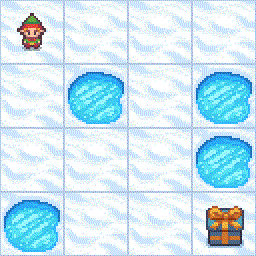

**Description**
The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.

Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.

The agent makes moves until it reaches the goal or fall in a hole.

The lake is slippery so the agent may move perpendicular to the intended direction sometimes.

Randomly generated worlds will always have a path to the goal.

**Action Space**

The action shape is (1,) in the range {0, 3} indicating which direction to move:

0: Move left

1: Move down

2: Move right

3: Move up

**Observation Space**

The observation is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0).

For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map.

The observation is returned as an int().

**Starting State**

The episode starts with the agent in state [0] (location [0, 0]).

**Rewards**

Reward schedule:

Reach goal: +1
Reach hole: 0
Reach frozen: 0

**Episode End**
The episode ends if the following happens:

Termination:

The agent moves into a hole.

The player reaches the goal at max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).

Truncation (when using the time_limit wrapper):
The length of the episode is 100 for 4x4 environment, 200 for 8x8 environment.

**If desc=None then map_name will be used. If both desc and map_name are None a random 8x8 map with 80% of locations frozen will be generated.**

**is_slippery=True: If true the agent will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions.**

For example, if action is left and is_slippery is True, then:

P(move left)=1/3

P(move up)=1/3

P(move down)=1/3

Documentation:
https://gymnasium.farama.org/environments/toy_text/frozen_lake/

# Taxi environement

The Taxi Problem involves navigating to passengers in a grid world, picking them up and dropping them off at one of four locations.

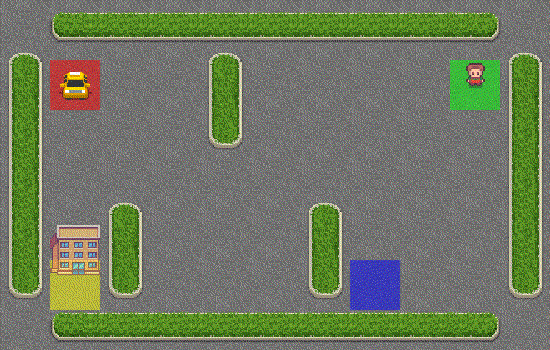

**Description**
There are four designated pick-up and drop-off locations (Red, Green, Yellow and Blue) in the 5x5 grid world. The taxi starts off at a random square and the passenger at one of the designated locations.

The goal is move the taxi to the passenger’s location, pick up the passenger, move to the passenger’s desired destination, and drop off the passenger. Once the passenger is dropped off, the episode ends.

The player receives positive rewards for successfully dropping-off the passenger at the correct location. Negative rewards for incorrect attempts to pick-up/drop-off passenger and for each step where another reward is not received.

**Action Space**
The action shape is (1,) in the range {0, 5} indicating which direction to move the taxi or to pickup/drop off passengers.

0: Move south (down)

1: Move north (up)

2: Move east (right)

3: Move west (left)

4: Pickup passenger

5: Drop off passenger

**Observation Space**
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations.

Destination on the map are represented with the first letter of the color.

Passenger locations:

0: Red

1: Green

2: Yellow

3: Blue

4: In taxi

Destinations:

0: Red

1: Green

2: Yellow

3: Blue

An observation is returned as an int() that encodes the corresponding state, calculated by ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

Note that there are 400 states that can actually be reached during an episode. The missing states correspond to situations in which the passenger is at the same location as their destination, as this typically signals the end of an episode. Four additional states can be observed right after a successful episodes, when both the passenger and the taxi are at the destination. This gives a total of 404 reachable discrete states.

**Starting State**
The episode starts with the player in a random state.

**Rewards**
-1 per step unless other reward is triggered.

+20 delivering passenger.

-10 executing “pickup” and “drop-off” actions illegally.

An action that results a noop, like moving into a wall, will incur the time step penalty. Noops can be avoided by sampling the action_mask returned in info.

**Episode End**
The episode ends if the following happens:

Termination: 1. The taxi drops off the passenger.

Truncation (when using the time_limit wrapper): 1. The length of the episode is 200.

**As taxi is not stochastic, the transition probability is always 1.0.**

Documentation:
https://gymnasium.farama.org/environments/toy_text/taxi/

# Sample template example of Value iteration for frozenLake **(using this code templete is optional)**

Similarly you can do for the other environment and for policy iteration

In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 20.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.8/

In [ ]:
""" Solving FrozenLake from OpenAI using Value Iteration """

import gymnasium as gym

import numpy as np 


""" value iteration function"""

def value_iteration(env, max_iterations=100000, lmbda=0.9):
  
  #your code here
  
  return "statevalue" 



"""Extracting the Policy from the Value Function
Now that we have the value function of all the states, our next step is to extract the policy from the Value Function.
We do this using a similar technique. 
For a particular state we calculate the state-action values of all the possible actions from that state 
and choose the action with the highest state-action value."""

def get_policy(env,stateValue, lmbda=0.9):
  
  #your code here
   
  return "policy" 



""" Now that we have the policy we can follow that policy and see if our agent reaches the goal or falls in a hole."""

def get_score(env, policy, episodes=200):
  
  #your code here
 
  print('----------------------------------------------')
  print('Number of steps to reach the goal if found using the current policy')
  print('best gamma value found')
  print('----------------------------------------------')



env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)

stateValues = value_iteration(env, max_iterations=100000)
policy = get_policy(env, stateValues)
get_score(env, policy,episodes=1000)

ModuleNotFoundError: ignored

# Questions for the above mention Gym Environments

**Note: all the observations should also be separately added/commented to your solution along with plots for better undersatnding of your results**


---


Q1. **Value Iteration**: Implement Value Iteration algorithm for the FrozenLake-v1 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding number of iterations till convergances on y-axis for both the environments.
In another graph, plot the value function of the start state ($s_0$) for each value of $\gamma$ for the FrozenLake. In case of taxi environment select the max norm over the value function for comparison.

Write your observations from these plots. Does the different values of $\gamma$ result in the same policy for each envrionemnt? Briefly discuss based on your observations. **[ 20 points]**


---


Q2. **Policy iteration**: Implement Policy Iteration algorithm for the FrozenLake-v1 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding total number of iterations till convergances on y-axis for both the environments. Also, plot the value function for the start state in case of FrozenLake and select max norm over the value function in case of taxi environment.

Does the policy converge before the value function in policy iteration? Comment based on your observations. **[20 points]**


---


Q3. Between policy iteration and value iteration, which one converges early to the optimal policy in each environment? Briefly discuss this based on your observations in the previous two questions. **[5 points]**


---


Q4: Impelment first-visit Monte-carlo prediction for estimating value function for FrozenLake-v1. Compare the converged value function found using monte carlo prediction to that of value iteration. Show your comparison using plots and comment on the performance of Monte-carlo prediction **[15 points]**

==============================================================================


In [ ]:
import numpy as np
import random
import time
import os
import gym
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import pandas as pd

from copy import deepcopy
from tqdm.notebook import tqdm
from dataclasses import dataclass
from matplotlib import animation
from IPython.display import HTML
from typing import Any
from collections import deque

mpl.rcParams['figure.dpi']= 100

In [ ]:
def plot(logs, x_key, y_key, legend_key, **kwargs):
    nums = len(logs[legend_key].unique())
    palette = sns.color_palette("hls", nums)
    if 'palette' not in kwargs:
        kwargs['palette'] = palette
    sns.lineplot(x=x_key, y=y_key, data=logs, hue=legend_key, **kwargs)

def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

# set random seed
seed = 0
set_random_seed(seed=seed)


**1.   SOLUTION FOR QUESTION 1**

---


**VALUE ITERATION FUNCTION**

In [ ]:
def value_iteration(env, gamma, max_iterations, eps=1e-6):
  elapsed = time.time()
  num_states = env.observation_space.n
  transition = env.env.P
  value_function = np.zeros(num_states)
  num_iterations = 0
  delta = float('inf')
  while(delta>=eps):
    num_iterations+=1
    delta = 0
    for state in range(num_states):
      prev_value = value_function[state]
      for action in transition[state]:
        updated_value = 0
        for prob, next_state, reward, is_terminal in transition[state][action]:
          updated_value += prob * (reward + gamma*value_function[next_state])
        value_function[state] = max(value_function[state], updated_value)
      delta = max(delta, abs(value_function[state]-prev_value))
  
  policy = np.zeros(num_states)
  for state in range(num_states):
    val = float('-inf')
    for action in transition[state]:
      return_val = 0
      for prob, next_state, reward, is_terminal in transition[state][action]:
        return_val+=prob*(reward+ gamma*value_function[next_state])
      if return_val>val:
        val = return_val
        policy[state] = action
  elapsed = time.time()-elapsed
  return value_function, policy, num_iterations, elapsed

**FOR FROZEN LAKE**

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="human")
iters1 = []
gamma_values1 = [0.1,0.3,0.5,0.7,0.99]
value_function1 = []
results = {}
for gamma in gamma_values1:
  value_info = value_iteration(env, gamma, max_iterations=100, eps=1e-6)
  value, policy, num_iterations, elapsed = value_info
  iters1.append(num_iterations)
  value_function1.append(value[0])
  results[gamma] = {'value_func': value, 'policy' : policy, 'iters' : num_iterations, 'elapsed_time': elapsed}
  print('\ngamma = ', gamma)
  print('value_function = \n', pd.DataFrame(value),'\n policy = ',policy,'\n num_iterations = ', num_iterations, '\n time = ',elapsed)
print('value_function for start state = ', value_function1)


gamma =  0.1
value_function = 
            0
0   0.000000
1   0.000000
2   0.000000
3   0.000000
4   0.000000
..       ...
59  0.000000
60  0.000411
61  0.011919
62  0.345239
63  0.000000

[64 rows x 1 columns] 
 policy =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 3. 2. 0. 0. 0. 1. 1. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 1. 0.] 
 num_iterations =  5 
 time =  0.004375457763671875

gamma =  0.3
value_function = 
            0
0   0.000000
1   0.000000
2   0.000000
3   0.000000
4   0.000000
..       ...
59  0.000000
60  0.004688
61  0.042194
62  0.375059
63  0.000000

[64 rows x 1 columns] 
 policy =  [0. 0. 0. 0. 0. 1. 2. 2. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 3. 2. 1.
 0. 0. 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 1. 1. 1. 0.] 
 num_iterations =  8 
 time =  0.003281116485595703

gamma =  0.5
value_function = 
                0
0   

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Text(0.5, 1.0, 'Frozen Lake')

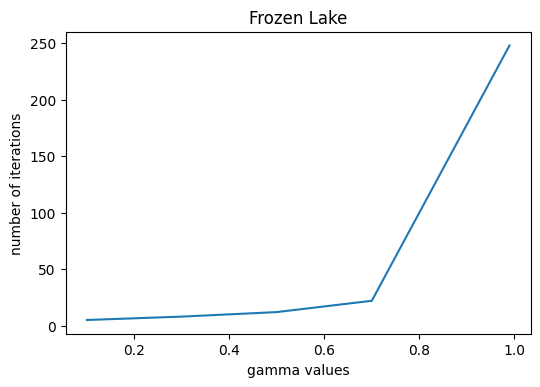

In [ ]:
plt.plot(gamma_values1,iters1)
plt.xlabel("gamma values")
plt.ylabel("number of iterations")
plt.title("Frozen Lake")

Text(0.5, 1.0, 'Frozen Lake')

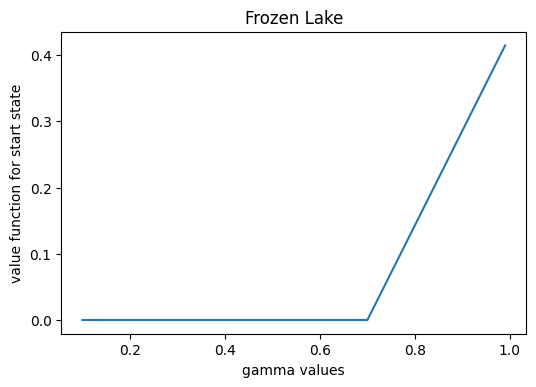

In [ ]:
plt.plot(gamma_values1,value_function1)
plt.xlabel("gamma values")
plt.ylabel("value function for start state")
plt.title("Frozen Lake")

**FOR TAXI ENVIRONMENT**

In [ ]:
from numpy.linalg import norm
from numpy import inf
env = gym.make('Taxi-v3')
gamma_values = [0.1,0.3,0.5,0.7,0.99]
iters3 = []
value_function3 = []
start_state = env.reset()
print('start state = ', start_state)
for gamma in gamma_values:
  value, policy, num_iterations, elapsed_time = value_iteration(env, gamma, max_iterations=100000)
  iters3.append(num_iterations)
  value_to_append = norm(value,inf)
  value_function3.append(value_to_append)
  print('\ngamma = ', gamma)
  print('value_function = ', value,'\n policy = ',policy,'\n num_iterations = ', num_iterations, '\n time = ',elapsed,'\n value_function of start state = ', value[start_state], '\n Max value = ', value_to_append)

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


start state =  481

gamma =  0.1
value_function =  [ 1.01010101  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         20.1010101   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.01010101  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.01010101
  0.          0.          0.          0.          0.          0.
  0.          1.01010101  0.   

Text(0.5, 1.0, 'Taxi Environment')

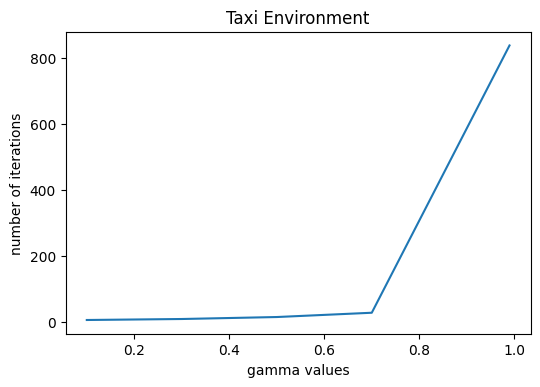

In [ ]:
plt.plot(gamma_values,iters3)
plt.xlabel("gamma values")
plt.ylabel("number of iterations")
plt.title("Taxi Environment")

Text(0.5, 1.0, 'Taxi Environment')

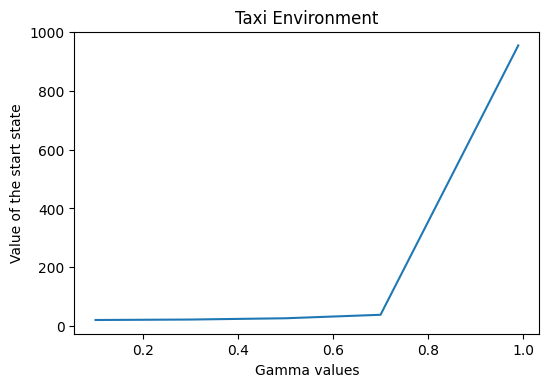

In [ ]:
plt.plot(gamma_values,value_function3)
plt.xlabel("Gamma values")
plt.ylabel("Value of the start state")
plt.title("Taxi Environment")

**OBSERVATIONS**

We can see that different values of gamma give different policies using value iteration. This is because different values of gamma indicate different goals. Higher the values of gamma, more far-sighted is the learning agent. Lower values of gamma indicate a policy which gives higher rewards in the immediate future, rather than having higher rewards in the long run. 

Because the taxi environment has a larger state space than the frozen lake environment, it takes more iterations before the value function converges.



---



---




**2.   SOLUTION FOR QUESTION 2**

---




**POLICY EVALUATION**

In [ ]:
def policy_evaluation(env, gamma, value_function, policy, eps=1e-6):
    num_iterations = 0
    num_states = env.observation_space.n
    transition = env.env.P
    while(True):
      num_iterations+=1
      delta = float('-inf')
      for state in range(num_states):
        prev_value = value_function[state]
        action = policy[state]
        updated_value = 0
        for prob, next_state, reward, is_terminal in transition[state][action]:
          updated_value+=prob*(reward+gamma*value_function[next_state])

        value_function[state] = max(value_function[state],updated_value)
        delta = max(delta, abs(value_function[state]-prev_value))
      
      if(delta<eps):
        break
    return value_function, num_iterations

**POLICY IMPROVEMENT**

In [ ]:
def policy_improvement(env, gamma, value_function, policy, eps=1e-6):
    policy_stable = True
    num_states = env.observation_space.n
    transition = env.env.P
    for state in range(num_states):
      prev_action = policy[state]
      max_return = float('-inf')
      best_action = -1
      for action in transition[state]:
        returns = 0
        for p, next_state, reward, is_terminal in transition[state][action]:
          returns+=p * (reward + gamma*value_function[next_state])
        if(returns>max_return or (returns == max_return and action == prev_action)):
          max_return, best_action = returns, action
      if(best_action!=prev_action):
        policy_stable = False
      
      policy[state] = best_action
    return policy_stable

**POLICY ITERATION**

In [ ]:
def policy_iteration(env, gamma, eps = 1e-6):
  elapsed = time.time()
  num_states = env.observation_space.n
  transition = env.env.P

  #policy = [np.random.choice(list(transition[state].keys())) for state in range(num_states)]
  policy = np.zeros(env.observation_space.n, dtype = 'int')

  value_function = np.zeros(num_states)
  
  num_iterations=0

  while(True):
    value_function, iterations = policy_evaluation(env, gamma, value_function, policy)
    num_iterations+=iterations
    policy_stable = policy_improvement(env, gamma, value_function, policy)
    if(policy_stable):
      break
  
  elapsed = time.time()-elapsed
  return value_function, policy, num_iterations, elapsed

**FOR FROZEN LAKE**

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode="human")
iters = []
#print(env.env.P)
gamma_values = [0.1,0.3,0.5,0.7,0.99]
value_function2 = []
for gamma in [0.1, 0.3, 0.5, 0.7, 0.99]:
  value, policy, num_iterations, elapsed = policy_iteration(env, gamma, eps=1e-6)
  iters.append(num_iterations)
  value_function2.append(value[0])
  print('\ngamma = ', gamma)
  print('value_function = \n', value,'\n policy = ',policy,'\n num_iterations = ', num_iterations, '\n time = ',elapsed,'\n value of start state = ', value[0])
print('value function for the start state = ', value_function2)


gamma =  0.1
value_function = 
 [1.96978129e-18 6.00164715e-17 1.29053502e-15 2.69903249e-14
 5.26584719e-13 7.61779263e-12 9.54734115e-11 6.08620830e-10
 2.22227800e-17 4.75790341e-16 1.04623523e-14 2.56357836e-13
 7.65398178e-12 1.25442636e-10 2.16010811e-09 1.70413833e-08
 1.95710579e-16 3.76342416e-15 5.64286931e-14 0.00000000e+00
 1.03650559e-10 1.59551702e-09 4.76364180e-08 4.92040006e-07
 1.94070521e-15 5.62046903e-14 1.67932947e-12 5.02675033e-11
 1.50638225e-09 0.00000000e+00 9.34892427e-07 1.42215238e-05
 1.95785730e-16 3.74932396e-15 5.61026264e-14 0.00000000e+00
 4.50375967e-08 9.04189926e-07 1.37776126e-05 4.11489297e-04
 7.42259404e-18 0.00000000e+00 0.00000000e+00 1.48642549e-08
 4.45431647e-07 1.33030476e-05 0.00000000e+00 1.19189681e-02
 2.40850715e-17 0.00000000e+00 1.65532529e-11 4.96026938e-10
 0.00000000e+00 3.97741806e-04 0.00000000e+00 3.45238585e-01
 7.03776444e-16 1.97295545e-14 5.71481377e-13 0.00000000e+00
 4.10998315e-04 1.19189511e-02 3.45238585e-01 0.0000

Text(0.5, 1.0, 'Frozen Lake')

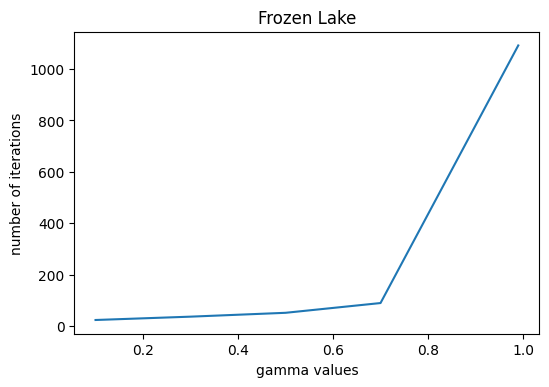

In [ ]:
plt.plot(gamma_values,iters)
plt.xlabel("gamma values")
plt.ylabel("number of iterations")
plt.title("Frozen Lake")

Text(0.5, 1.0, 'Frozen Lake')

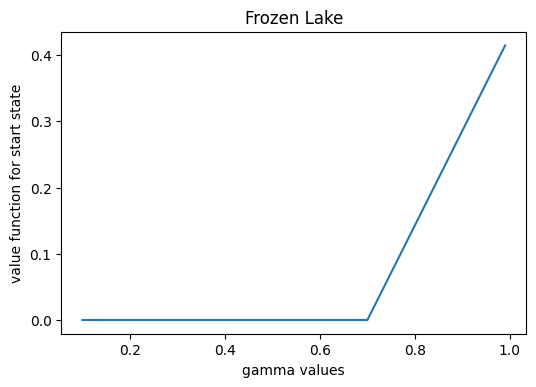

In [ ]:
plt.plot(gamma_values,value_function2)
plt.xlabel("gamma values")
plt.ylabel("value function for start state")
plt.title("Frozen Lake")

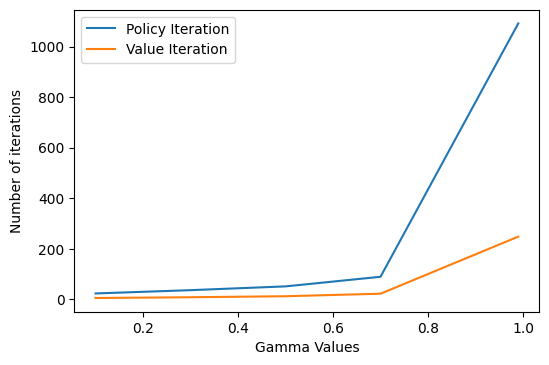

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = [0.1,0.3,0.5,0.7,0.99]

plt.plot(x,iters, label='Policy Iteration')
plt.plot(x,iters1, label='Value Iteration')
plt.xlabel('Gamma Values')
plt.ylabel('Number of iterations')
plt.legend()
plt.show()

**FOR TAXI ENVIRONMENT**

In [ ]:
from numpy.linalg import norm
from numpy import inf
env = gym.make('Taxi-v3')
iters4 = []
gamma_values4 = [0.1,0.3,0.5,0.7,0.99]
value_function4 = []
start_state = env.reset()
print('start state = ', start_state)
for gamma in [0.1, 0.3, 0.5, 0.7, 0.99]:
  value, policy, num_iterations, elapsed = policy_iteration(env, gamma, eps=1e-6)
  iters4.append(num_iterations)
  value_to_append = norm(value,inf)
  value_function4.append(value_to_append)
  print('\ngamma = ', gamma)
  print('value_function = \n', value,'\n policy = ',policy,'\n num_iterations = ', num_iterations, '\n time = ',elapsed,'\n value of start state = ', value[0], '\n Max value = ', value_to_append)
print('Norm of value function for each gamma = ', value_function4)

start state =  364

gamma =  0.1
value_function = 
 [ 1.01010101  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         20.1010101   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.01010101  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.01010101
  0.          0.          0.          0.          0.          0.
  0.          1.01010101  0.  

Text(0.5, 1.0, 'Taxi Environment')

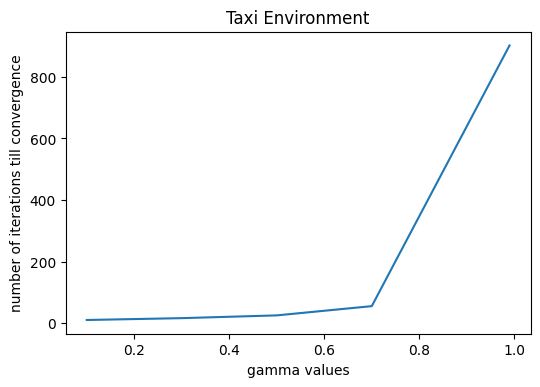

In [ ]:
plt.plot(gamma_values,iters4)
plt.xlabel("gamma values")
plt.ylabel("number of iterations till convergence")
plt.title("Taxi Environment")

Text(0.5, 1.0, 'Taxi Environment')

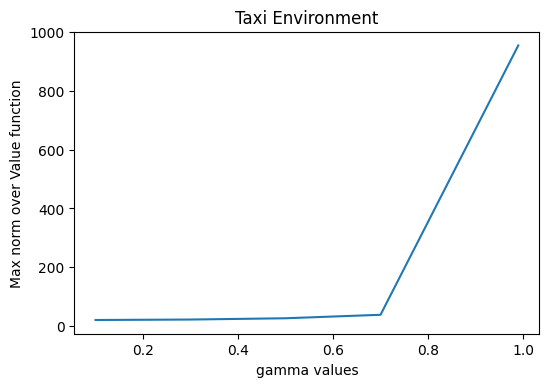

In [ ]:
plt.plot(gamma_values,value_function4)
plt.xlabel("gamma values")
plt.ylabel("Max norm over Value function")
plt.title("Taxi Environment")

**OBSERVATION**

The policy converges earlier than the value function. In fact, the final iteration is an extra iteration to confirm that there has been no change in policy and thus that the policy has converged. However, the value function is still updated.

In addition, we don't wait for the value function to converge until the difference equals zero, beacuse in mplementation, it never happens. We use a small constant _eps_ as the value function's limit of convergence.



---



---



**3.    SOLUTION FOR QUESTION 3**

---



Value Iteration converges earlier to the optimal policy as compared to Policy Iteration, which uses more number of iterations to converge to the optimal policy. This is because it combines the policy evaluation and policy improvement step by making updates in the value function directly. However, value iteration is overall slower (takes more time) than policy iteration since it involves argmax over all possible actions in each state.

Here are few results summarized: (for eps = 1e-6 and gamma=0.99)


|             | Number of Iterations |                  |
| :---------: | :------------------: | :--------------: |
| Environment |   Value Iteration    | Policy Iteration |
| Frozen_Lake |         248          |       1092       |
|    Taxi     |         839          |       1322       |






---



---



**4. SOLUTION FOR QUESTION 4**

---



**FIRST-VISIT MONTE CARLO PREDICTION**

In [ ]:
def monte_carlo(env, gamma, policy, theta = 1e-8):
  elapsed = time.time()
  num_iters = 0
  actions = list(range(env.env.action_space.n))
  num_states = env.observation_space.n
  value_function = [[0,0] for i in range(num_states)]

  for i in range(int(10000)):
    num_iters+=1;
    state = env.reset()
    episode = []
    done = False
    maxdiff = [0 for j in range(num_states)]

    num_visited = [0 for j in range(num_states)]
    while(done==False):
      num_visited[state]+=1
      action = policy[state]
      next_state, reward, done, info = env.step(action)
      episode.append([state, action, reward, next_state])
      state = next_state
    
    gain = 0
    for state, action, reward, next_state in episode[::-1]:
      prev_value_function = value_function[state][0]
      gain = reward + gamma*gain
      if num_visited[state]!=1:
        num_visited[state]-=1;
        continue
      value_function[state][1]+=1
      value_function[state][0]+=((gain - value_function[state][0]) / value_function[state][1])
      maxdiff[state] = abs(value_function[state][0] - prev_value_function)

  value_function = [j[0] for j in value_function]
  elapsed = time.time()-elapsed
  return value_function, num_iters, elapsed

**FOR FROZEN LAKE**

In [ ]:
env = gym.make('FrozenLake8x8-v1')
states_fl = env.observation_space.n 
results_mc_frozenlake = {}
for gamma in [0.1,0.3,0.5,0.7,0.99]:
  policy = results[gamma]['policy']
  value_function, num_iterations, elapsed = monte_carlo(env, gamma, policy)
  results_mc_frozenlake[gamma] = {'value_func': value_function,'policy': policy,'iters': num_iterations,'elapsed_time': elapsed}
  print('\ngamma = ', gamma)
  print('value_function = \n', pd.DataFrame(value_function), '\n policy = \n',pd.DataFrame(policy),'\n number of iterations = ', num_iterations, '\n time elapsed = ', elapsed)

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(



gamma =  0.1
value_function = 
       0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
59  0.0
60  0.0
61  0.0
62  0.0
63  0.0

[64 rows x 1 columns] 
 policy = 
       0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
59  0.0
60  1.0
61  1.0
62  1.0
63  0.0

[64 rows x 1 columns] 
 number of iterations =  10000 
 time elapsed =  29.83833360671997

gamma =  0.3
value_function = 
                0
0   1.082821e-27
1   0.000000e+00
2   0.000000e+00
3   0.000000e+00
4   0.000000e+00
..           ...
59  0.000000e+00
60  5.026788e-03
61  4.261639e-02
62  3.266328e-01
63  0.000000e+00

[64 rows x 1 columns] 
 policy = 
       0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
59  0.0
60  1.0
61  1.0
62  1.0
63  0.0

[64 rows x 1 columns] 
 number of iterations =  10000 
 time elapsed =  16.607702016830444

gamma =  0.5
value_function = 
                0
0   2.241112e-09
1   0.000000e+00
2   4.254325e-07
3   6.818222e-07
4   2.987150e-06
..           ...
59  0.000000e+00
60  1.747341e-02
6

**COMPARISON OF MONTE CARLO & VALUE ITERATION ON FROZEN LAKE**

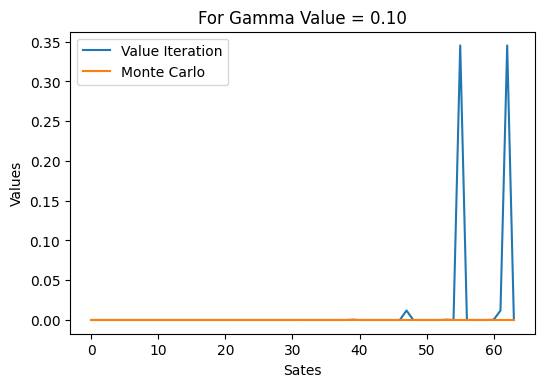

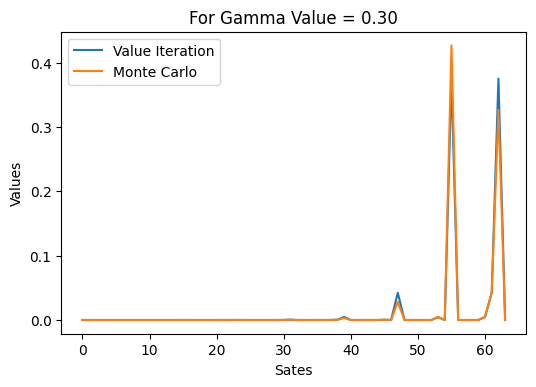

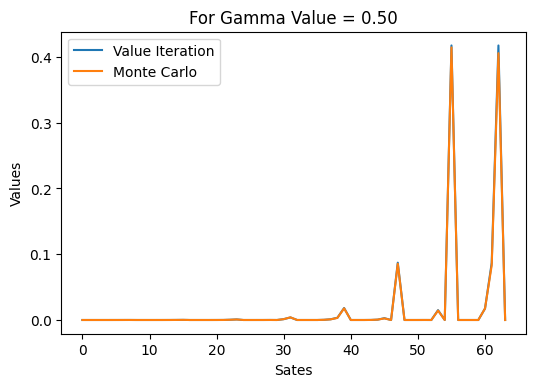

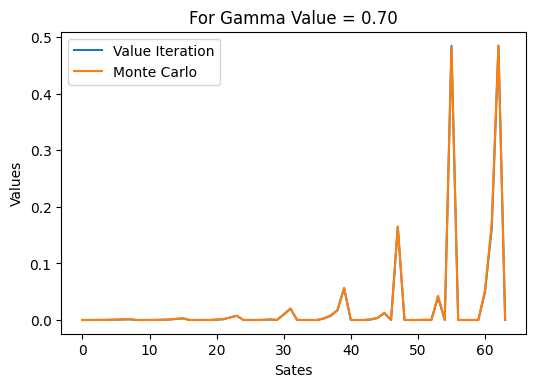

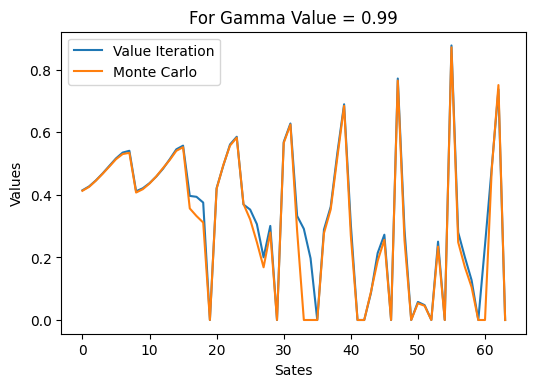

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = [0.1,0.3,0.5,0.7,0.99]

for gamma in x:
  print('\n')
  plt.plot(list(range(env.observation_space.n)),results[gamma]['value_func'], label='Value Iteration')
  plt.plot(list(range(env.observation_space.n)),results_mc_frozenlake[gamma]['value_func'], label='Monte Carlo')
  plt.title('For Gamma Value = %.2f' % gamma)
  plt.xlabel('Sates')
  plt.ylabel('Values')
  plt.legend()
  plt.show()

**OBSERVATIONS**

For larger values of gamma, the monte carlo converges very slowly because larger gamma means that errors in subsequent states cause significant errors in the state for which the value function is being computed. This is also visible in the plots above. Even after one million iterations, the value functions of monte carlo and value iteration differ slightly.

This clearly shows how much experience is required for value function estimation in the absence of an environment model.

The plots clearly show that the value functions for both algorithms are nearly equal, indicating convergence in monte carlo.



---



---



#RL Agent playing Kaun Banega Crorepati (KBC)

Let us create an RL agent to play the KBC. We will consider that there are only 10 levels (restricting our agent to win only ₹3,20,000/- as per the KBC format). As you might be aware, at each level Mr. Amitabh Bachchan asks one question and four options are provided. If our agent answers correctly then the agent wins an amount based on the current level (it starts with ₹1,000/-). As the levels increase, the questions get tough to answer however the reward money also increases.

At every level, after answering the question correctly, our agent can decide whether to play at the next level or quit. If quit option is choosen then all the money earned so far can be kept as reward and the game ends. However, at any round if our agent chooses to play and then fails to answer correctly then all the money earned so far is lost and the game ends. The goal is to generate a policy in order to accumulate the maximum amount of money from KBC. 

Lets say the money at each level are (as per the KBC game show):

1. ₹1,000
2. ₹2,000
3. ₹3,000
4. ₹5,000
5. ₹10,000
6. ₹20,000
7. ₹40,000
8. ₹80,000
9. ₹1,60,000
10. ₹3,20,000

The probability of winning at each level is given as : 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1 (the probability of loosing at any level can be accordingly determined)


#Questions:

1. Formulate the above problem as an MDP; mention all the key components. **[5 points]**

2. Generate an optimal policy using policy iteration (Intialize with a random policy and perform policy iteration until the policy converges). **[10 points]**

3. Print a table of V(s) value of each state for each iteration of converged policy evaluation and precisely comment on noticeable observations. **[5 points]**




---

**SOLUTION FOR KBC PROBLEM**

---



**SOLUTION FOR QUESTION 1**

**STATE SPACE** = {question 1 (state 0), question 2 (state 1), question 3 (state 2), question 4, question 5, question 6, question 7, question 8, question 8, question 9, question 10, state 10 (terminal state)}

QUESTION 1 - STATE 0

QUESTION 2 - STATE 1

QUESTION 3 - STATE 2

QUESTION 4 - STATE 3

QUESTION 5 - STATE 4

QUESTION 6 - STATE 5

QUESTION 7 - STATE 6

QUESTION 8 - STATE 7

QUESTION 9 - STATE 8

QUESTION 10 - STATE 9

TERMINAL STATE - STATE 10


---



If the agent plays the game, it has 4 options to choose from in each state, namely, Option A, Option B, Option C, Option D, out of which only one is correct and the others are incorrect. If the agent answers correctly, then it has the option to choose if it wants to PLAY further or QUIT the game. If the agent gives a wrong answer, it loses the game and the game ends. After playing question 10, the agent either wins or loses. 

If the agent choose to QUIT or it LOSES the game, there is no action space for the agent and the game ends. 

**ACTION SPACE** = {PLAY, QUIT}

ACTION = 0      => PLAY

ACTION = 1      => QUIT


In [ ]:
def kbc_env():
  #dictionary to contain the state transition probabilities for the states and their corresponding actions i.e p(s'|s,a)
  """transition[state_1] is a dictionary with actions that we can take from state_1 as keys and further each action has a list
      where each element of the list is a tuple showing p(s'|s,a), next state s',reward, and boolean done."""
  transition = {}

#probability of winning from each of the 10 non-terminal states
  prob_of_win = [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

#Rewards corresponding to each of the 10 non-terminal states
  rewards = [1000,2000,3000,5000,10000,20000,40000,80000,160000,320000]

#iterating over all the 10 non-terminal states 
  for s in range(10):
    state = {}

  #if agent chooses to PLAY, i.e., action choosen = 0
    a=0
    state[0] = []
    state[1] = []
  #if the current state is 9 (last non-terminal state)
    if s==9:
      state[0].append((prob_of_win[s],s+1,rewards[s],True))
    else:
      #REWARD IS TAKEN AS ZERO HERE BECAUSE WE ASSUME THAT THE AGENT WINS THE MONEY ONCE IT MOVES TO THE TERMINAL STATE, ELSE THERE IS ZERO REWARD (TILL THE GAME ENDS EITHER BY WINNING OR LOSING OR QUITTING)
      state[0].append((prob_of_win[s],s+1,0,False))
  
    state[0].append((1-prob_of_win[s],10,0,True))

    a=1

    if(s>0):
      reward = rewards[s-1]
    else:
      reward=0

    state[1].append((1,10,reward,True))
    transition[s] = state
  return transition

**SOLUTION FOR QUESTION 2 & 3**

In [ ]:
def policy_evaluation2(trans_prob, gamma, value_function, policy, num_iters, eps=1e-6):
    num_iterations = num_iters
    num_states = 10
    transition = trans_prob
    value_func_for_eachiter = []
    while(True):
      num_iterations+=1
      delta = float('-inf')
      print('Iteration Number ',num_iterations,'\n')
      value_for_each_state = []
      for state in range(num_states):
        prev_value = value_function[state]
        action = policy[state]
        updated_value = 0
        for prob, next_state, reward, is_terminal in transition[state][action]:
          if next_state==10:
            updated_value+=prob*reward
            break
          updated_value+=prob*(reward+gamma*value_function[next_state])

        value_function[state] = max(value_function[state],updated_value)
        value_for_each_state.append(value_function[state])
        print('State ',state,' Value = ',value_function[state],'\n')
        delta = max(delta, abs(value_function[state]-prev_value))
      
      value_func_for_eachiter.append(value_for_each_state)
      if(delta<eps):
        break
    return value_function, num_iterations,value_func_for_eachiter

In [ ]:
def policy_improvement2(trans_prob, gamma, value_function, policy, eps=1e-6):
    policy_stable = True
    num_states = 10
    transition = trans_prob
    for state in range(num_states):
      prev_action = policy[state]
      max_return = float('-inf')
      best_action = -1
      for action in transition[state]:
        returns = 0
        for p, next_state, reward, is_terminal in transition[state][action]:
          if next_state==10:
              returns+=p*reward
              break
          returns+=p * (reward + gamma*value_function[next_state])
        if(returns>max_return or (returns == max_return and action == prev_action)):
          max_return, best_action = returns, action
      if(best_action!=prev_action):
        policy_stable = False
      
      policy[state] = best_action
    return policy_stable

In [ ]:
def policy_iteration2(trans_prob, gamma, eps = 1e-6):
  elapsed = time.time()
  num_states = 10
  transition = trans_prob

  policy = [np.random.choice(list(transition[state].keys())) for state in range(num_states)]
  #policy = np.zeros(10, dtype = 'int')

  value_function = np.zeros(11)
  
  num_iterations=0

  while(True):
    value_function, num_iterations, value_func_for_eachiter = policy_evaluation2(transition, gamma, value_function, policy, num_iterations)
    #num_iterations=iterations
    print('value function of each state for each iteration = \n',pd.DataFrame(value_func_for_eachiter),'\n')
    policy_stable = policy_improvement2(transition, gamma, value_function, policy)
    if(policy_stable):
      break
  
  elapsed = time.time()-elapsed
  return value_function, policy, num_iterations, elapsed


In [ ]:
import pandas as pd
trans_prob = kbc_env()
#print(trans_prob)
value_function, policy, num_iters, elapsed = policy_iteration2(trans_prob,1)
print('policy = \n',pd.DataFrame(policy))
print('value_func = ',value_function)
print('Num of iterations = ', num_iters)

Iteration Number  1 

State  0  Value =  0.0 

State  1  Value =  1000.0 

State  2  Value =  2000.0 

State  3  Value =  0.0 

State  4  Value =  5000.0 

State  5  Value =  10000.0 

State  6  Value =  20000.0 

State  7  Value =  40000.0 

State  8  Value =  80000.0 

State  9  Value =  160000.0 

Iteration Number  2 

State  0  Value =  990.0 

State  1  Value =  1000.0 

State  2  Value =  2000.0 

State  3  Value =  3500.0 

State  4  Value =  5000.0 

State  5  Value =  10000.0 

State  6  Value =  20000.0 

State  7  Value =  40000.0 

State  8  Value =  80000.0 

State  9  Value =  160000.0 

Iteration Number  3 

State  0  Value =  990.0 

State  1  Value =  1000.0 

State  2  Value =  2000.0 

State  3  Value =  3500.0 

State  4  Value =  5000.0 

State  5  Value =  10000.0 

State  6  Value =  20000.0 

State  7  Value =  40000.0 

State  8  Value =  80000.0 

State  9  Value =  160000.0 

value function of each state for each iteration = 
        0       1       2       3

**OBSERVATIONS**

We see that in each iteration, the value function is get more and more closer to the optimal value function , i.e, it is converging to the optimal value.

#Managing a Warehouse

Assume, you are the manager of a warehouse where you need to keep the inventory of the stocks as per the expected customer demand.  For simplicity, let's assume you manage maximum 15 units of only 1 product in the warehouse . At the end of each day, you look at the stock in hand $s_t$. The decision to order additional units of the product is then made at the end of every day and the delivery happens by next day early morning. 

The demand for the product arrives throughtout the day which is immediately serviced. Products are sold in whole units. The total demand thoughout the day is Poisson distributed with mean rate of 5 units. In case, the demand exceeds the inventory, the extra demand is lost.

There is a fixed cost K=5 and a variable cost $c(u) = 2u$ for placing an order of $u$ units ($C(u) = K+c(u)$, if $u=0$ then $C(u) = 0$). Further, there is a holding cost $h(u) = u$ for each item in inventory at the end of the day. For each unit sold, the revenue is $f(u) = 8u$.

The reward function over the current state and action $(s,a)$ is given as:

$ r_t(s, a) = F(s+a) - C(a) - h(s+a)$

where, $F(u)$ is the expected revenue from the available units $u$ given as:

$F(u) = ∑_{j=0}^{u-1} f(j)p_j + f(u)q_u$

$q_u = \sum_{j=u}^{∞}p_j$ \\
$q_u$ is the probability with which demand exceeds the inventory

The transition probability is given as:

$
T(j|s,a)  =\left\{
\begin{align} 
            &  0, \text{if}~ j>s+a \\
            & p_{s+a-j}, \text{if}~ s+a \geq j > 0 \\
            & q_{s+a}, \text{if}~  j = 0 
\end{align}
\right.
$


#Questions

1. Formulate the above problem as an MDP; mention all the key components and Print the reward and transition matrix. [5 points]

2. Run value iteration to find a policy for optimal ordering of the stocks in order to maximize the revenue. [10 points]

3. Make a table for each iteration of value iteration mentioning the gap between successive value vectors and maximum value function of a state in that iteration. Print the final policy that your model finds. [5 marks]




---

**SOLUTION FOR WAREHOUSE PROBLEM**

---



**SOLUTION FOR QUESTION 1**

The above problem can be formulated as an MDP. The state space will consist of number of units left with the manager at the end of the day, i.e. the stock in hand at the end of the day. Since we can manage a maximum of 15 units only, the state space is discrete from 0 to 15.

**State Space = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}**

The demand for the product follows a Poisson distribution, with mean rate of 5. If the demand exceeds the inventory, the extra demand is lost.

The action space will consist of the number of units ordered by the manager at the end of the day. Thus, the action space is also discrete from 0 to 15.

**Action Space = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}**



In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
import pandas as pd

In [ ]:
def warehouse_env():
  
  transition = {}

  prob_of_demand = [0.00674,0.03369,0.08422,0.14037,0.17547,0.17547,0.14622,0.10444,0.06528,0.03627,0.01813,0.00824,0.00343,0.00132,0.00047,0.00016,0.00005,0.00001,0,0,0]

  q = []
  f = []
  exf = []
  C = []
  h = []
  for u in range(16):
    q.append(0)
    f.append(0)
    exf.append(0)
    C.append(0)
    h.append(0)
  
  for u in range(16):
    for j in range(u,20):
      q[u]+=prob_of_demand[j]
    print('q[%d] = '%u,q[u],'\n')

  
  for u in range(16):
    f[u] = 8*u
    h[u] = u
    if(u==0):
      C[u]=0
    else:
      C[u]=5+2*u

  for u in range(16):
    sum = 0
    for j in range(u):
      sum+=(f[j]*prob_of_demand[j])
    
    exf[u] = sum + f[u]*q[u]


  

  rewards = {}
  for s in range(16):
    state_rewards={}

    for a in range(16):
      state_rewards[a] = 0
      if(s+a>15):
        state_rewards[a] = 0
      else:
        state_rewards[a] = exf[s+a]-C[a]-h[s+a]
      #print('State = ',s,' Action = ',a,' reward = ',rewards[s][a],'\n')

    rewards[s]=state_rewards
 
  reward_keyvalpairs = rewards.items()
  list_data = list(reward_keyvalpairs)
  numpy_array = np.array(list_data)
  print('\nRewards = \n', numpy_array,'\n')


  for s in range(16):
    state = {}

  #if agent chooses to PLAY, i.e., action choosen = 0
    for a in range(16):
      state[a] = []
      
  #if the current state is 9 (last non-terminal state)
      for finals in range(16):
        if(s+a>15):
          state[a].append((0,finals,rewards[s][a]))
        elif(finals==0):
          state[a].append((q[s+a],finals,rewards[s][a]))
        elif(finals>s+a):
          state[a].append((0,finals,rewards[s][a]))
        else:
          state[a].append((prob_of_demand[s+a-finals], finals, rewards[s][a]))

      
    transition[s] = state

  reward_keyvalpairs2 = transition.items()
  list_data2 = list(reward_keyvalpairs2)
  numpy_array2 = np.array(list_data2)
  print('\nTransition probabilities = \n', numpy_array2,'\n')

  return rewards, transition 
  

In [ ]:
rewards_wh, transition_wh = warehouse_env()

q[0] =  0.9999800000000001 

q[1] =  0.99324 

q[2] =  0.95955 

q[3] =  0.87533 

q[4] =  0.73496 

q[5] =  0.55949 

q[6] =  0.38402000000000003 

q[7] =  0.23779999999999998 

q[8] =  0.13335999999999998 

q[9] =  0.06807999999999999 

q[10] =  0.031810000000000005 

q[11] =  0.01368 

q[12] =  0.0054399999999999995 

q[13] =  0.00201 

q[14] =  0.0006900000000000001 

q[15] =  0.00022 


Rewards = 
 [[0
  {0: 0.0, 1: -0.054079999999999906, 2: 4.62232, 3: 8.624960000000002, 4: 11.504639999999998, 5: 12.980560000000004, 6: 13.05272, 7: 11.95512, 8: 10.021999999999998, 9: 7.5666399999999925, 10: 4.8211200000000005, 11: 1.9305599999999998, 12: -1.0259200000000064, 13: -4.009840000000004, 14: -7.004320000000007, 15: -10.00256000000001}]
 [1
  {0: 6.94592, 1: 6.62232, 2: 10.624960000000002, 3: 13.504639999999998, 4: 14.980560000000004, 5: 15.05272, 6: 13.95512, 7: 12.021999999999998, 8: 9.566639999999992, 9: 6.8211200000000005, 10: 3.93056, 11: 0.9740799999999936, 12: -2.009840000000004,

**SOLUTION FOR QUESTION 2 & 3**

In [ ]:
def value_iteration_warehouse(trans_mat, gamma, eps=1e-6):
  elapsed = time.time()
  num_states = 16
  transition = trans_mat
  value_function = np.zeros(num_states)
  num_iterations = 0
  gap_value_func = []
  max_value_func = []
  delta = float('inf')
  while(delta>=eps):
    num_iterations+=1
    delta = 0
    state_value_func = []
    for state in range(num_states):
      prev_value = value_function[state]
      for action in transition[state]:
        updated_value = 0
        for prob, next_state, reward in transition[state][action]:
          updated_value += prob * (reward + gamma*value_function[next_state])
        value_function[state] = max(value_function[state], updated_value)
      state_value_func.append(abs(value_function[state]-prev_value))
      delta = max(delta, abs(value_function[state]-prev_value))
    gap_value_func.append(state_value_func)
    max_value_func.append(np.max(value_function))
  
  policy = np.zeros(num_states)
  for state in range(num_states):
    val = float('-inf')
    for action in transition[state]:
      return_val = 0
      for prob, next_state, reward in transition[state][action]:
        return_val+=prob*(reward+ gamma*value_function[next_state])
      if return_val>val:
        val = return_val
        policy[state] = action
  elapsed = time.time()-elapsed
  return value_function, policy, num_iterations, elapsed, gap_value_func, max_value_func

In [ ]:
value_func_wh, policy_wh, num_iters_wh, elapsed, gap_val_func, max_val_func = value_iteration_warehouse(transition_wh,0.9)
print('Optimal policy = \n',policy_wh)
print('\nValue Function for optimal policy = \n',value_func_wh)
print('\nNumber of iterations = ',num_iters_wh)
print('\nValue function gap of each state for each iteration = \n',pd.DataFrame(gap_val_func))
print('\nMax value of value function for any state = \n',pd.DataFrame(max_val_func))

Optimal policy = 
 [8. 7. 6. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Value Function for optimal policy = 
 [166.21994998 168.2199101  170.21987019 172.21983031 174.88947153
 179.19246379 182.50182177 185.07846885 187.2195308  189.12385635
 190.85867876 192.40711785 193.73232134 194.81430088 195.65430487
 196.26385649]

Number of iterations =  91

Value function gap of each state for each iteration = 
               0             1             2             3             4   \
0   2.285879e+01  3.250409e+01  3.834027e+01  4.364814e+01  4.929016e+01   
1   3.689773e+01  3.310536e+01  3.307430e+01  3.303454e+01  3.206660e+01   
2   2.596109e+01  2.448182e+01  2.354194e+01  2.302086e+01  2.248297e+01   
3   1.842073e+01  1.748252e+01  1.715278e+01  1.641301e+01  1.608928e+01   
4   1.353782e+01  1.318138e+01  1.257284e+01  1.216263e+01  1.184851e+01   
..           ...           ...           ...           ...           ...   
86  2.022545e-06  1.974399e-06  1.937591e-06  1.887018e-06  1.